# ARIMA for 5166.KL

## Data Preparation

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import yfinance as yf
from pmdarima.arima import ADFTest
from pandas_datareader import data as pdr

In [2]:
def check(x):
    adf = ADFTest()
    print("ADF:",adf.is_stationary(x)[1])

In [6]:
yf.pdr_override()
#load ticker for stock
df = pdr.get_data_yahoo("5166.KL", period="max", end="2020-04-30")
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
# Change all column headings to be lower case, and remove spacing
df.tail()
df.dropna()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adj_close,volume
Date,,,,,,
2010-05-18,3.600,4.01,3.600,3.96,2.542616,77518800
2010-05-19,3.930,3.97,3.800,3.83,2.459146,8407700
2010-05-20,3.810,3.86,3.760,3.83,2.459146,8376100
2010-05-21,3.760,3.89,3.750,3.82,2.452725,3677300
2010-05-24,3.850,3.85,3.750,3.79,2.433463,2240000
...,...,...,...,...,...,...
2020-03-06,0.040,0.04,0.040,0.04,0.040000,404000
2020-03-09,0.035,0.04,0.035,0.04,0.040000,914200
2020-03-10,0.040,0.04,0.040,0.04,0.040000,2800


In [7]:
df = df.filter(items=['adj_close'])
check(df)

ADF: True


C:\Users\Teradon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Teradon\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


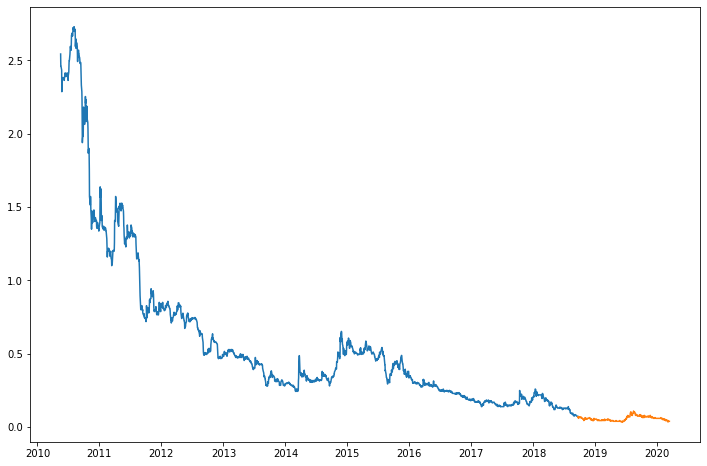

In [8]:
n=366
train = df[:-n]
test = df[-n:]
plt.figure(figsize=(12,8))
plt.plot(train)
plt.plot(test)
plt.show()

## Training the model

In [9]:
from pmdarima import auto_arima

model = auto_arima(train,trace=True,m=7,error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
Fit ARIMA(2,2,2)x(1,0,1,7) [intercept=True]; AIC=-10128.226, BIC=-10083.190, Time=6.095 seconds
Fit ARIMA(0,2,0)x(0,0,0,7) [intercept=True]; AIC=-9013.118, BIC=-9001.859, Time=0.317 seconds
Fit ARIMA(1,2,0)x(1,0,0,7) [intercept=True]; AIC=-9517.377, BIC=-9494.859, Time=1.864 seconds
Fit ARIMA(0,2,1)x(0,0,1,7) [intercept=True]; AIC=-10137.764, BIC=-10115.246, Time=2.756 seconds
Fit ARIMA(0,2,0)x(0,0,0,7) [intercept=False]; AIC=-9015.113, BIC=-9009.484, Time=0.146 seconds
Fit ARIMA(0,2,1)x(0,0,0,7) [intercept=True]; AIC=-10168.200, BIC=-10151.312, Time=1.233 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,2,1)x(1,0,1,7) [intercept=True]; AIC=-10163.799, BIC=-10135.652, Time=5.547 seconds
Near non-invertible roots for order (0, 2, 1)(1, 0, 1, 7); setting score to inf (at least one inverse root too close to the border o

ARIMA(order=(1, 2, 1), seasonal_order=(0, 0, 1, 7), suppress_warnings=True)

## Forecasting on the dataset

In [10]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

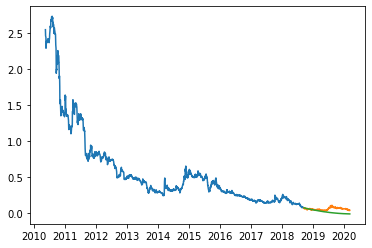

In [11]:
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

## Evaluating the trained model

In [12]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test,forecast['Prediction']))

0.0025258323757062374


## Forecasting beyond the dataset

In [13]:
model.update(test)

ARIMA(order=(1, 2, 1), seasonal_order=(0, 0, 1, 7), suppress_warnings=True)

In [14]:
dates = pd.date_range(start='2020-05-01', periods=n)

In [15]:
forecast = model.predict(n_periods=n)
forecast = pd.DataFrame(forecast,index = dates,columns=['Prediction'])

In [18]:
forecast.tail()

,Prediction
2021-04-27,0.089757
2021-04-28,0.090086
2021-04-29,0.090416
2021-04-30,0.090747
2021-05-01,0.091079


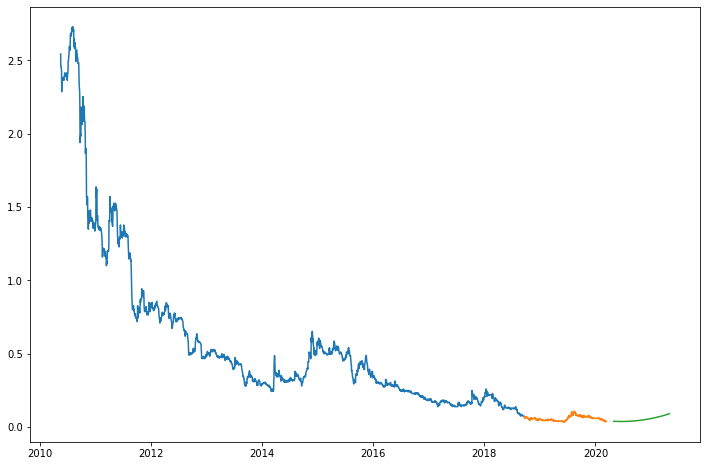

In [16]:
plt.figure(figsize=(12,8))
plt.plot(train,label="Train")
plt.plot(test,label='Test')
plt.plot(forecast,label='Forecast')
plt.show()